In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reading the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
fraud = df[df['Class'] == 1]
safe = df[df['Class'] == 0]
print('The number of fraud transactions are {}'.format(fraud.shape[0]))
print('The number of safe transactions are {}'.format(safe.shape[0]))

The number of fraud transactions are 492
The number of safe transactions are 284315


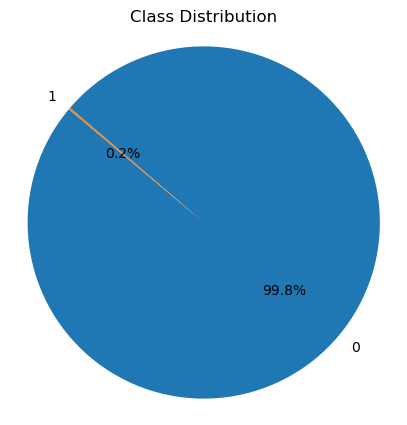

In [10]:
labels = df['Class'].value_counts().index
sizes = df['Class'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

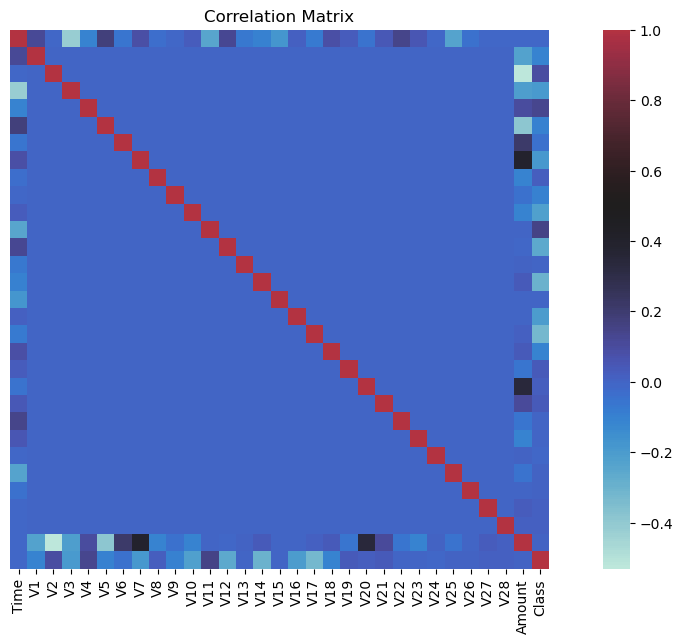

In [11]:
#Searching for any correlations
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(df.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

No highly dependent or independent for target variable

# The objective is to find out why balancing is necessary in an unbalanced dataset.


# Let's not balance and see the results.

**1. Split the training and test dataset.**

In [12]:
inputs = df.drop("Class", axis="columns")
targets = df.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

In [13]:
print("y test value counts:\n" ,y_test.value_counts(),"\n\n")
print("y train value counts:\n" ,y_train.value_counts())

y test value counts:
 0    56868
1       94
Name: Class, dtype: int64 


y train value counts:
 0    227447
1       398
Name: Class, dtype: int64


**2. Fit the model**

In [14]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train,y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.85      0.66      0.74        94

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

0.9992451107756047


We got 99.9% accuracy without doing any balancing. Why is it then necessary to balance ? That will be answered by a confusion matrix.

# confusion matrix

The Confusion Matrix is a table used to describe the performance of a classification model's true values on test data. It contains 4 different combinations of estimated and actual values.

Terminology and derivations from a confusion matrix:

* true positive (TP): The predicted value by the model matches the actual value (The actual value was positive, and the machine learning model predicted a positive value)

* true negative (TN): The predicted value by the model matches the actual value (The actual value was negative, and the machine learning model predicted a negative value)
* false positive (FP): The machine learning model made a false prediction (The actual value was negative, but the machine learning model predicted a positive value)
* false negative (FN): The machine learning model made a false prediction (The actual value was positive, but the machine learning model predicted a negative value)

|                      | Predicted Positive |  Predicted Negative |
|:--------------------:|:------------------:|:------------------:|
|    Actual Positive   |   True Positive    |  False Negative    |
|    Actual Negative   |   False Positive   |   True Negative    |

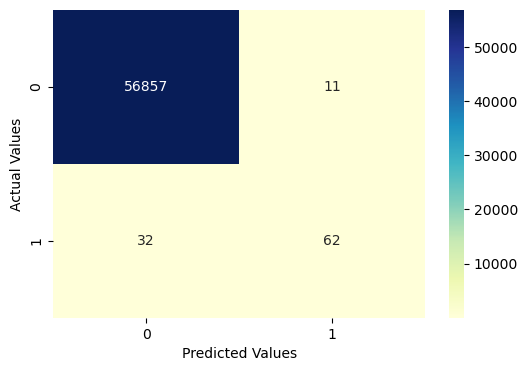

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

We see that 32 of fraud transactions (out of 94) have been classified as legit (False Negative). But only 11 of legit transactions (out of 56868) have been classified as fraud(False positive). Or in other words,only 62 fraud transactions(out of 94, which makes it 65.9%) were accurately classified as fraud. But 56839 legit transactions (out of 56868, which makes it 99.95%) were accurately classified as legit.
Which means that our model is doing well to predict the legit transactions but not so well to predict the fraud transactions. Which means that 99.9% accuracy is pretty much the accuracy to predict legit transactions, not fraud. But that's not what we are trying to achieve.

**What if we scale Time and Amount in our dataset ?**

(scaling features refers to the process of adjusting the numerical values of different features in a dataset to a common scale, This is done to ensure that all features contribute equally to machine learning algorithms and to improve their performance and convergence)

In [16]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
inputs = df.drop("Class", axis="columns")
targets = df.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

lets train the model again

In [18]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train,y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

0.9992977774656788


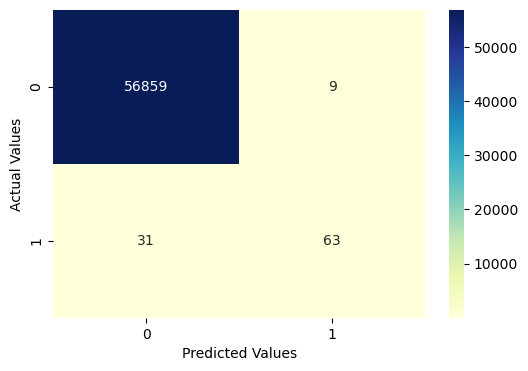

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

we see that scaling our features help by reducing the number of both false positives and false nagatives

So we will continue usinge scaled features

# How to handle imbalanced datasets

One of the mainly used methodes is the Resampling which is to make the data set more balanced by adding new samples to the minority class or removing samples from the majority class.
There are different techniques for this:
Balancing with Undersampling
* Random Undersampling
* Random Oversampling
* SMOTE (Synthetic Minority Over-sampling Technique)
* ADASYN (Adaptive Synthetic Sampling)

## 1. Random Undersampling

We intend to address the data imbalance issue by performing undersampling specifically on the legitimate transactions within our training dataset. It's important to note that we won't apply the balancing technique to the test data. We have chosen to retain the imbalance in the test set to ensure that the model's evaluation aligns with its real-world application, where imbalanced data is prevalent.

To execute this approach, we will first recreate the training data from x_train and y_train to separate legit and fraud transactions.

In [20]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
245582,0.800327,0.041780,-3.678592,-2.185288,2.145642,-0.108133,5.326785,-3.320732,-4.715889,-0.676015,...,-1.528738,0.281099,-1.687634,-5.947433,0.991956,-0.871129,-0.674865,0.526634,0.318034,0
33921,-0.555129,-0.296793,1.289134,0.467212,-1.035215,0.348510,0.965128,0.162317,0.188477,0.053558,...,-0.051953,-0.147832,-0.362923,-0.230544,-1.427948,0.650917,0.465196,-0.022903,0.009328,0
18808,-0.645073,1.439251,0.824080,-1.197571,1.671425,0.999394,-1.540596,1.480644,-1.451232,0.713797,...,0.017694,0.162967,0.668738,-0.229503,-0.232408,0.256959,0.741650,0.042034,0.029245,0
52806,-0.458640,-0.028226,-0.763642,1.153200,0.845734,-0.287226,-0.005743,-0.137666,0.255488,0.578325,...,0.036340,-0.183093,-0.678964,-0.037631,-0.529925,-0.096189,0.108287,0.126774,0.039826,0
200909,0.575030,-0.167819,1.986009,-0.337558,-0.418934,0.369815,-0.360600,-0.012716,-0.588175,-0.005277,...,-0.113618,0.199920,0.863473,0.130956,0.660961,-0.034146,-0.240472,0.047897,-0.028392,0


In [21]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]

In [22]:
#Check how many frauds we got so that we can undersample legit transactions to that number.
print(legit_train.shape, fraud_train.shape)

(227447, 31) (398, 31)


So, we see that there are 227447 legit transactions and 398 fraud transactions in our training data set. We will balance this dataset by randomly selecting 398 legit transactions out of 227447. This is called random undersampling.

In [23]:
legit_train = legit_train.sample(n=398)
legit_train.shape

(398, 31)

In [24]:
#Now that we have same number of fraud and legit transactions, let's join them back to recreate a complete balanced training dataset.
train_data_undersampled = pd.concat([legit_train, fraud_train], axis=0)
train_data_undersampled.shape

(796, 31)

Let's separate features and targets from the new training dataset.



In [25]:
x_train_undersampled = train_data_undersampled.drop('Class', axis='columns')
y_train_undersampled = train_data_undersampled.Class

We don't have to bother with the test dataset because it will stay the same. So, we will just fit the model with new x_train_new, y_train_new and old x_test, y_test.

In [26]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train_undersampled,y_train_undersampled)
y_predicted_undersampled = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted_undersampled))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.90      0.10        94

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

0.9715775429233524


We got an accuracy of 96.56%. Not bad. Let's check the confusion matrix.



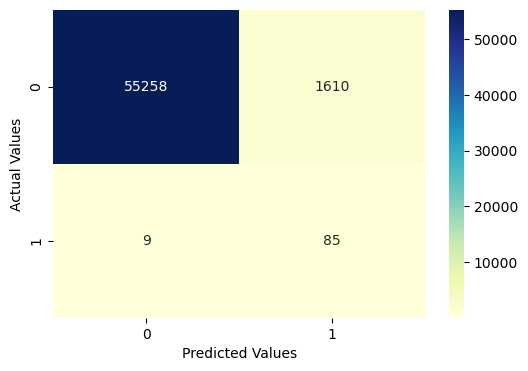

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_undersampled)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

From the confusion matrix, we see that 85 fraud transactions (out of 94, which makes it 90.4% ) were accurately classified as fraud. And 54870 legit transactions (out of 56868, which makes it 96.48%) were accurately classified as legit. Only 9 fraud transactions were classified as legit transactions. This result shows that even though we got less accuracy, this model is better at predicting the fraud transactions.

## 2. Random Oversampling

In the other hand Random Oversampling involves randomly selecting instances from the minority class and adding them to the training dataset until the class distribution is more balanced.
and that's why we will randomly duplicate fraud transactions untill we get a balanced new dataset.

In [28]:
from sklearn.utils import resample

In [29]:
not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

In [30]:
# before oversamling
print(not_fraud.shape, fraud.shape)

(284315, 31) (492, 31)


now we will split our data to 80% for training and 20% for testing

In [31]:
not_fraud_test,not_fraud_train = np.split(not_fraud, [int(0.2*len(not_fraud))])
fraud_test,fraud_train = np.split(fraud, [int(0.2*len(fraud))])

We will duplicate fraud transactions untill the number of frauds matches the number of not fraud transactions ( len(not_fraud_train) ) and we will fix random_state number to get reproducible results

In [32]:

upsampled_fraud = resample(fraud_train,n_samples=len(not_fraud_train),random_state=649)



In [33]:
upsampled_fraud.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
215132,0.649197,9.798225,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,...,2.230735,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,1
150715,0.108942,-0.148117,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,...,0.208879,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,1
154718,0.211198,-0.307413,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,...,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,1
42549,-0.511578,0.925452,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
223618,0.690375,-0.293440,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,...,0.474414,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1


Now we got our upsampled fraud dataset lets combine it with not fraud training dataset and the same for upsampled test dataset

In [34]:
upsampled = pd.concat([not_fraud_train, upsampled_fraud])
#upsampled_test=pd.concat([not_fraud_test,fraud_test])

In [35]:
upsampled.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
57020,-0.434404,3.633061,0.934579,-2.003423,0.481372,-1.145185,-1.942035,-0.240137,-0.991312,-0.056544,...,0.181464,0.127067,0.189862,-0.205840,0.079787,0.160506,-0.101570,0.015643,0.070298,0
57021,-0.434404,-0.165165,-6.154789,2.928868,-0.835675,2.210270,-2.444283,0.373182,-3.072278,2.605398,...,-1.888023,0.825350,-0.163207,0.786004,0.013806,0.657940,-0.012926,-1.304513,-0.545071,0
57022,-0.434404,0.950045,-0.740183,1.631581,-1.188712,0.604324,-0.100936,-0.067405,0.482974,0.795169,...,-0.021242,0.150673,0.415332,0.048315,-0.842631,-0.493429,-0.347446,0.320403,0.121759,0
57023,-0.434404,6.665269,0.500221,-2.764925,0.446308,-0.966963,-2.326963,-0.078322,-0.866899,-0.031600,...,0.601666,0.155062,-0.265143,-0.296255,0.063021,-0.107776,-0.255781,-0.017438,0.113645,0
57024,-0.434380,1.253127,-3.740383,-1.841766,-0.388768,-3.307671,-1.172888,0.399554,-0.943201,1.601730,...,-0.723363,-0.044882,0.130936,-0.142799,-0.937011,0.088822,-0.790606,0.017063,-0.474127,0


0    227452
1    227452
Name: Class, dtype: int64


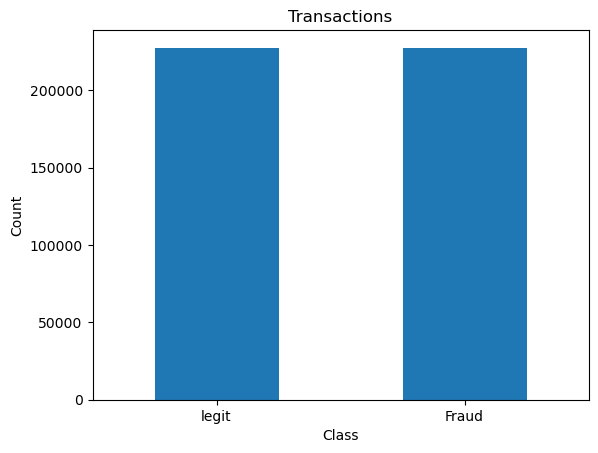

In [36]:
print(upsampled['Class'].value_counts())
labels = ["legit", "Fraud"]
count_classes = upsampled.value_counts(upsampled['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

we see that we got a balanced new dataset

In [37]:
x_train_ov = upsampled.drop("Class" , axis="columns")
y_train_ov = upsampled.Class
#x_test_ov = upsampled_test.drop("Class" , axis="columns")
#y_test_ov = upsampled_test.Class

In [38]:
from sklearn.linear_model import LogisticRegression
lorg = LogisticRegression(max_iter=10000)
lorg.fit(x_train_ov , y_train_ov)
y_pred_upsampled_model = lorg.predict(x_test)
print("accuracy = ",lorg.score(x_test , y_test))

accuracy =  0.9634844282153014


In [39]:
print(classification_report(y_test,y_pred_upsampled_model))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56868
           1       0.04      0.90      0.08        94

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



we see that we got a good accuracy (96.34%) and it is similar to the accuracy of random undersampling

now let's see the confusion matrix

Text(0.5, 23.52222222222222, 'Predicted Label')

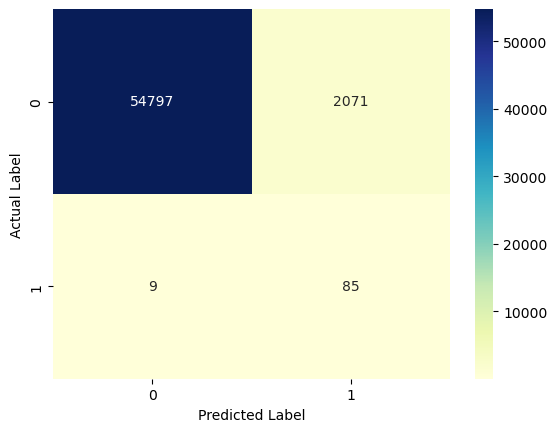

In [40]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_upsampled_model)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

oversampling's confusion matrix is relatively similar to undersampling's confusion matrix but a litle decrease of the true positives and the true negatives decrease the accuracy a little bit.
To sum up random oversamling gives similar results as random undersampling.

## 3. SMOTE (Synthetic Minority Over-sampling Technique) 

**Objective:** SMOTE is used to balance class distribution in datasets with imbalanced classes.

**Process:** It generates synthetic instances for the minority class using existing instances and their nearest neighbors.

**Algorithm Steps:**

   1.     Identify instances of the minority class.
   2.     Select nearest neighbors for each instance.
   3.     Create synthetic instances along line segments between instance and neighbors.
   4.     Add synthetic instances to the dataset.
    
**Benefits:**

   *     Improved model performance on the minority class.
   *     Helps prevent bias towards the majority class.
   *     Preserves original data patterns while creating synthetic instances.

**Considerations:**

   *     Careful selection of neighbors is important.
   *     Can potentially lead to overfitting if not used judiciously.
   *     Implementation: SMOTE is available in Python libraries like imbalanced-learn and Scikit-learn.

**Usage:** It's effective when combined with other techniques like cross-validation and thorough model evaluation.

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state=31)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

let's check if dataset is now balanced

In [43]:
print(y_train_smote.value_counts())

0    227447
1    227447
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

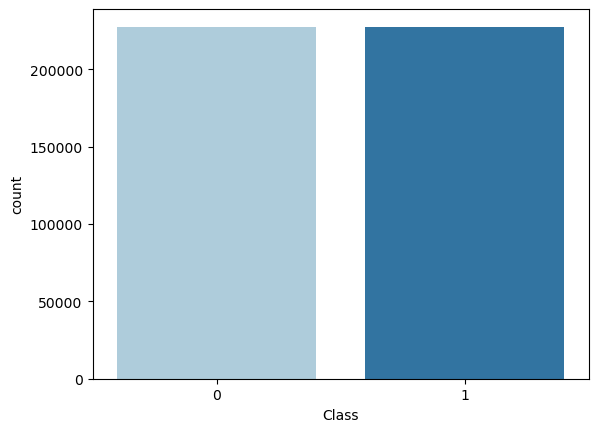

In [44]:
sns.countplot(x=y_train_smote,palette='Paired')

Now let's fit the model and see its performance

In [45]:
from sklearn.linear_model import LogisticRegression
lorg = LogisticRegression(max_iter = 10000)
lorg.fit(x_train_smote , y_train_smote)
y_pred_smote = lorg.predict(x_test)
print("accuracy = ",lorg.score(x_test , y_test))

accuracy =  0.974474210877427


In [46]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.06      0.91      0.11        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



Now let's check the confusion matrix

Text(0.5, 23.52222222222222, 'Predicted Label')

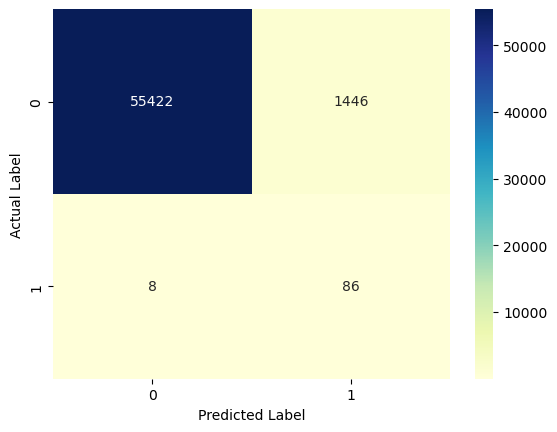

In [47]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

We can see that using the SMOTE method makes it much better at figuring out when something is actually not there (negative instances) compared to other methods we tried. The SMOTE method gave us only 8 cases where it wrongly thought something was there when it wasn't. This shows that SMOTE helps the model do a better job at telling apart the things we're interested in from the things we're not.

## 4. ADASYN (Adaptive Synthetic Sampling)

ADASYN is also used to address class imbalance in datasets by generating synthetic instances for the minority class, thereby improving the model's ability to recognize and classify the minority class instances accurately.
but the main differences between ADASYN and SMOTE are:

**1. Nearest Neighbors:**

* SMOTE uses a fixed number of neighbors for all instances.
* ADASYN adapts the number of neighbors based on instance density.

**2. Sample Generation:**

* SMOTE generates synthetic samples uniformly between instances and their neighbors.
* ADASYN places more emphasis on generating samples in challenging regions of the feature space.

**3. Density Consideration:**

* SMOTE does not explicitly consider instance density.
* ADASYN considers instance density to focus on difficult-to-classify regions.

**4. Adaptiveness:**

* SMOTE treats all instances equally when generating samples.
* ADASYN adapts sampling to improve classification in areas with severe class imbalance.

In essence, ADASYN introduces adaptiveness by dynamically adjusting nearest neighbors and emphasizing regions with difficult classification due to class imbalance, potentially leading to more effective performance improvement for imbalanced datasets.

In [48]:
from imblearn.over_sampling import ADASYN

let's resample the dataset

In [49]:
adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

Now let's check if our dataset has become balanced

In [50]:
print(y_train_adasyn.value_counts())

0    227447
1    227429
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

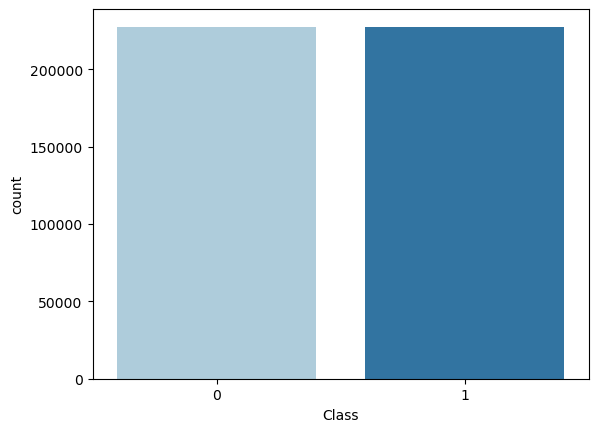

In [51]:
sns.countplot(x=y_train_adasyn,palette='Paired')

Now it's time to built the model

In [52]:
from sklearn.linear_model import LogisticRegression
lorg = LogisticRegression(max_iter = 10000)
lorg.fit(x_train_adasyn , y_train_adasyn)
y_pred_adasyn = lorg.predict(x_test)
print("accuracy = ",lorg.score(x_test , y_test))

accuracy =  0.9172430743302552


let's check the performance

In [53]:
print(classification_report(y_test,y_pred_adasyn))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56868
           1       0.02      0.90      0.03        94

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



the confusion matrix

Text(0.5, 23.52222222222222, 'Predicted Label')

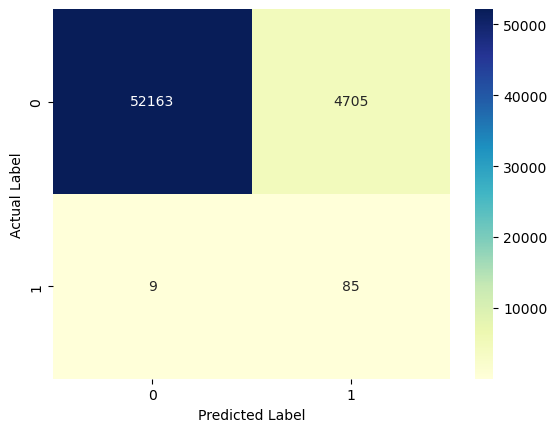

In [54]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_adasyn)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

We see that ADASYN does not give us better results as SMOTE, Upsampled and Undersampled data, because it increase the number of false positives and false negatives (4705 false negatives !)
As a conlusion we dont really see good results from ADASYN and that's why we will continue without using it below.

# Balancing Act: Tackling Imbalanced Datasets with Smart Models

In the following section, we explore various classification models that offer effective ways to tackle the challenges presented by imbalanced datasets. 

Handling imbalanced data, where one class is way less common than the other, is a usual challenge in machine learning. To tackle this problem, we'll explore various models known for their skill in managing such situations more effectively. With the help of these models, we intend to make our predictions more accurate and dependable, particularly when we have unequal numbers of different classes.

**let's import our models**

In [55]:
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

### Random Forest Classifier:


Random Forest is an ensemble method that combines multiple decision trees to make more accurate predictions. Each tree is trained on a subset of the data and produces its own prediction. The final prediction is determined by aggregating the predictions of all individual trees, often using majority voting for classification tasks.

In [56]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test)

### Gradient Boosting Classifier (XGBoost):

XGBoost is a powerful gradient boosting algorithm known for its performance and efficiency. It builds multiple decision trees sequentially, each trying to correct the errors of the previous one. The final prediction is a weighted sum of the predictions from all trees.

In [57]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(x_test)

### Support Vector Machine (SVM):


SVM is a versatile algorithm used for both classification and regression tasks. It finds a hyperplane that best separates classes in the feature space by maximizing the margin between the classes. SVM can also use kernel functions to transform data into higher-dimensional spaces for better separation.

In [58]:
# Create and train the SVM model with a pipeline for standardization
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test)

### Ploting Confusion Matrices and Classification reports

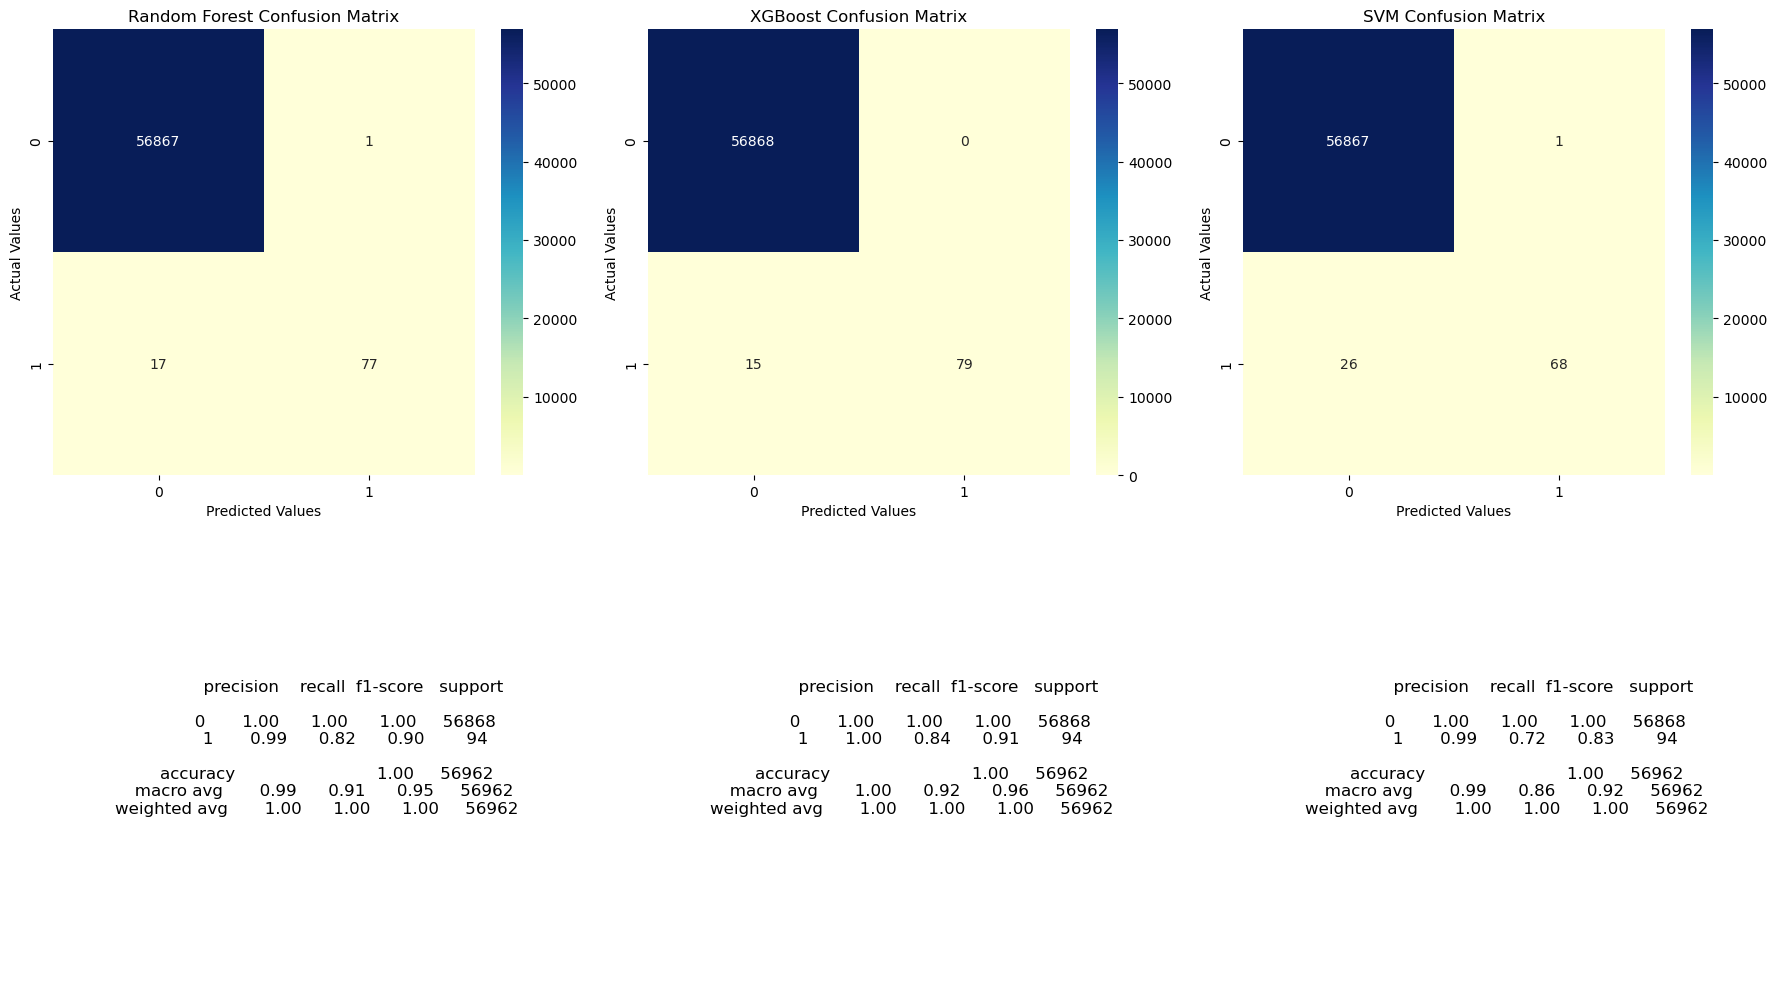

In [59]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_rf, y_pred_xgb, y_pred_svm]

# Create subplots for each model's confusion matrix
plt.figure(figsize=(18, 10))  

for i, model_name in enumerate(model_names):
    confusion_matrix = metrics.confusion_matrix(y_test, predictions[i])
    
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    
    plt.subplot(2, 3, i + 4)
    classification_rep = metrics.classification_report(y_test, predictions[i])
    plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Let's see the results on SMOTE

### Random Forest Classifier:

In [60]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_smote, y_train_smote)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test)

### Gradient Boosting Classifier (XGBoost):

In [61]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_smote, y_train_smote)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(x_test)

### Support Vector Machine (SVM):

In [62]:
# Create and train the SVM model with a pipeline for standardization
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_model.fit(x_train_smote, y_train_smote)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test)

### Ploting Confusion Matrices and Classification reports

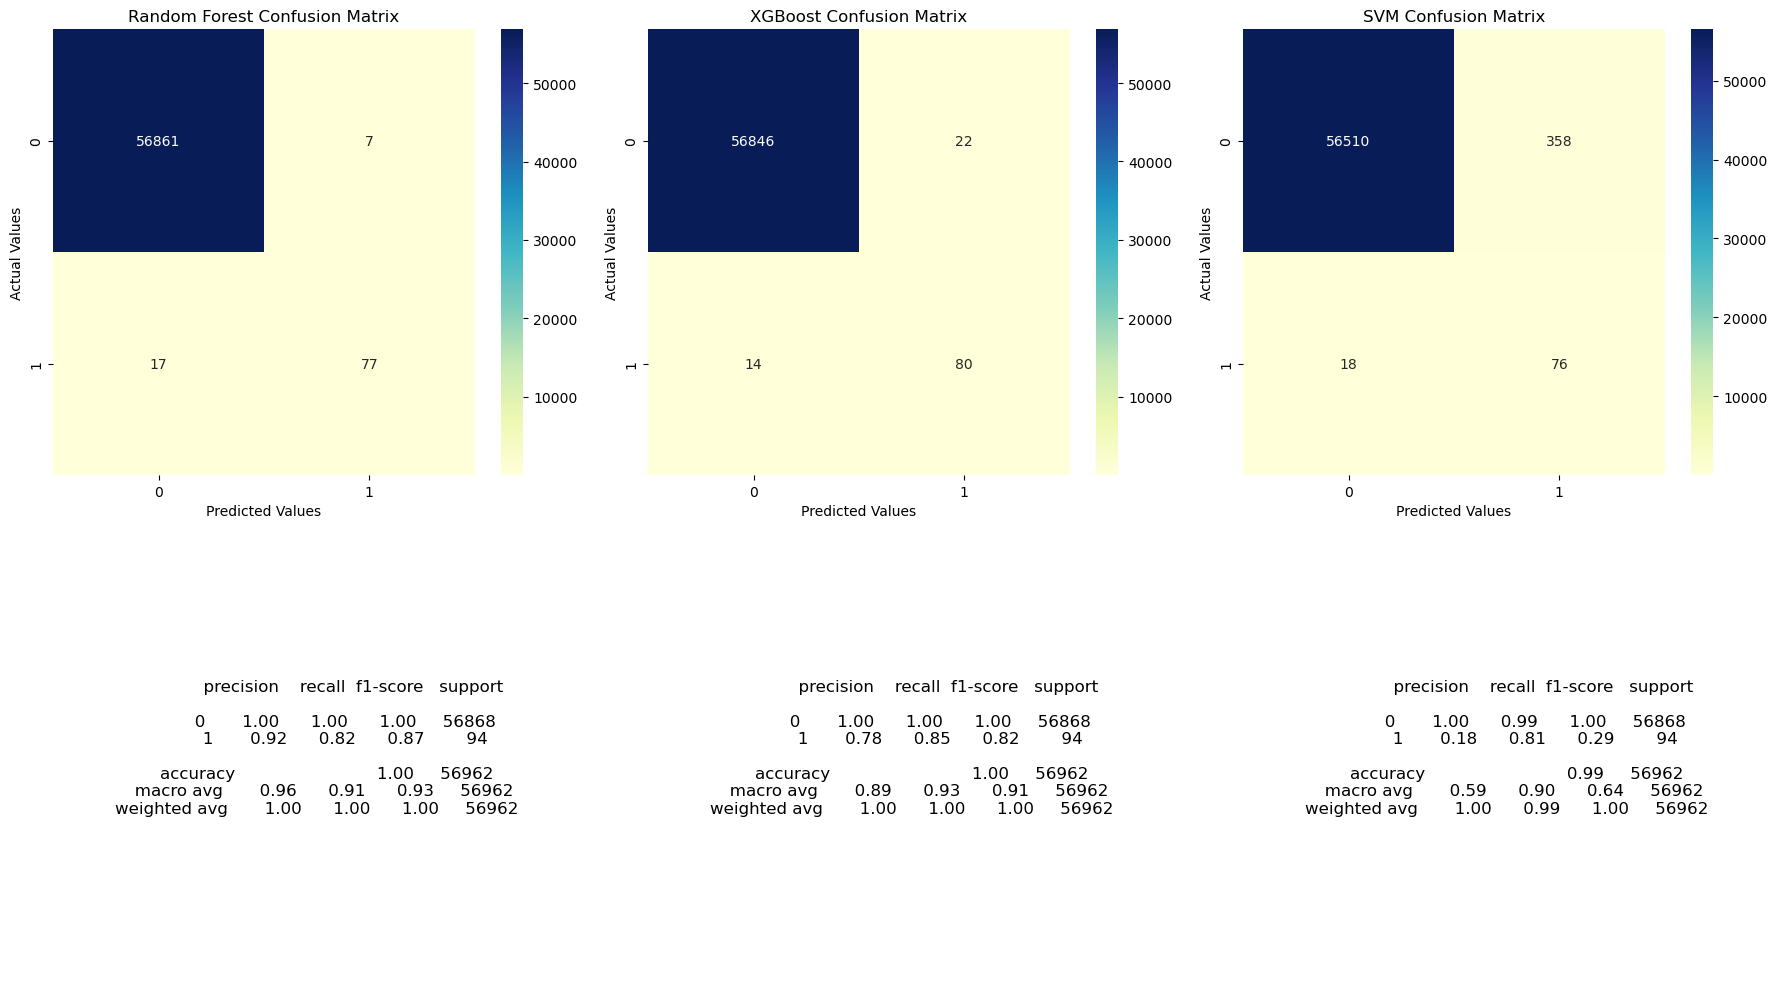

In [63]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_rf, y_pred_xgb, y_pred_svm]

# Create subplots for each model's confusion matrix
plt.figure(figsize=(18, 10))  

for i, model_name in enumerate(model_names):
    confusion_matrix = metrics.confusion_matrix(y_test, predictions[i])
    
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    
    plt.subplot(2, 3, i + 4)
    classification_rep = metrics.classification_report(y_test, predictions[i])
    plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Let's see the results on Oversampled dataset

### Random Forest Classifier:

In [64]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_ov, y_train_ov)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test)

### Gradient Boosting Classifier (XGBoost):

In [65]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_ov, y_train_ov)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(x_test)

### Support Vector Machine (SVM):

In [66]:
# Create and train the SVM model with a pipeline for standardization
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_model.fit(x_train_ov, y_train_ov)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test)

### Ploting Confusion Matrices and Classification reports

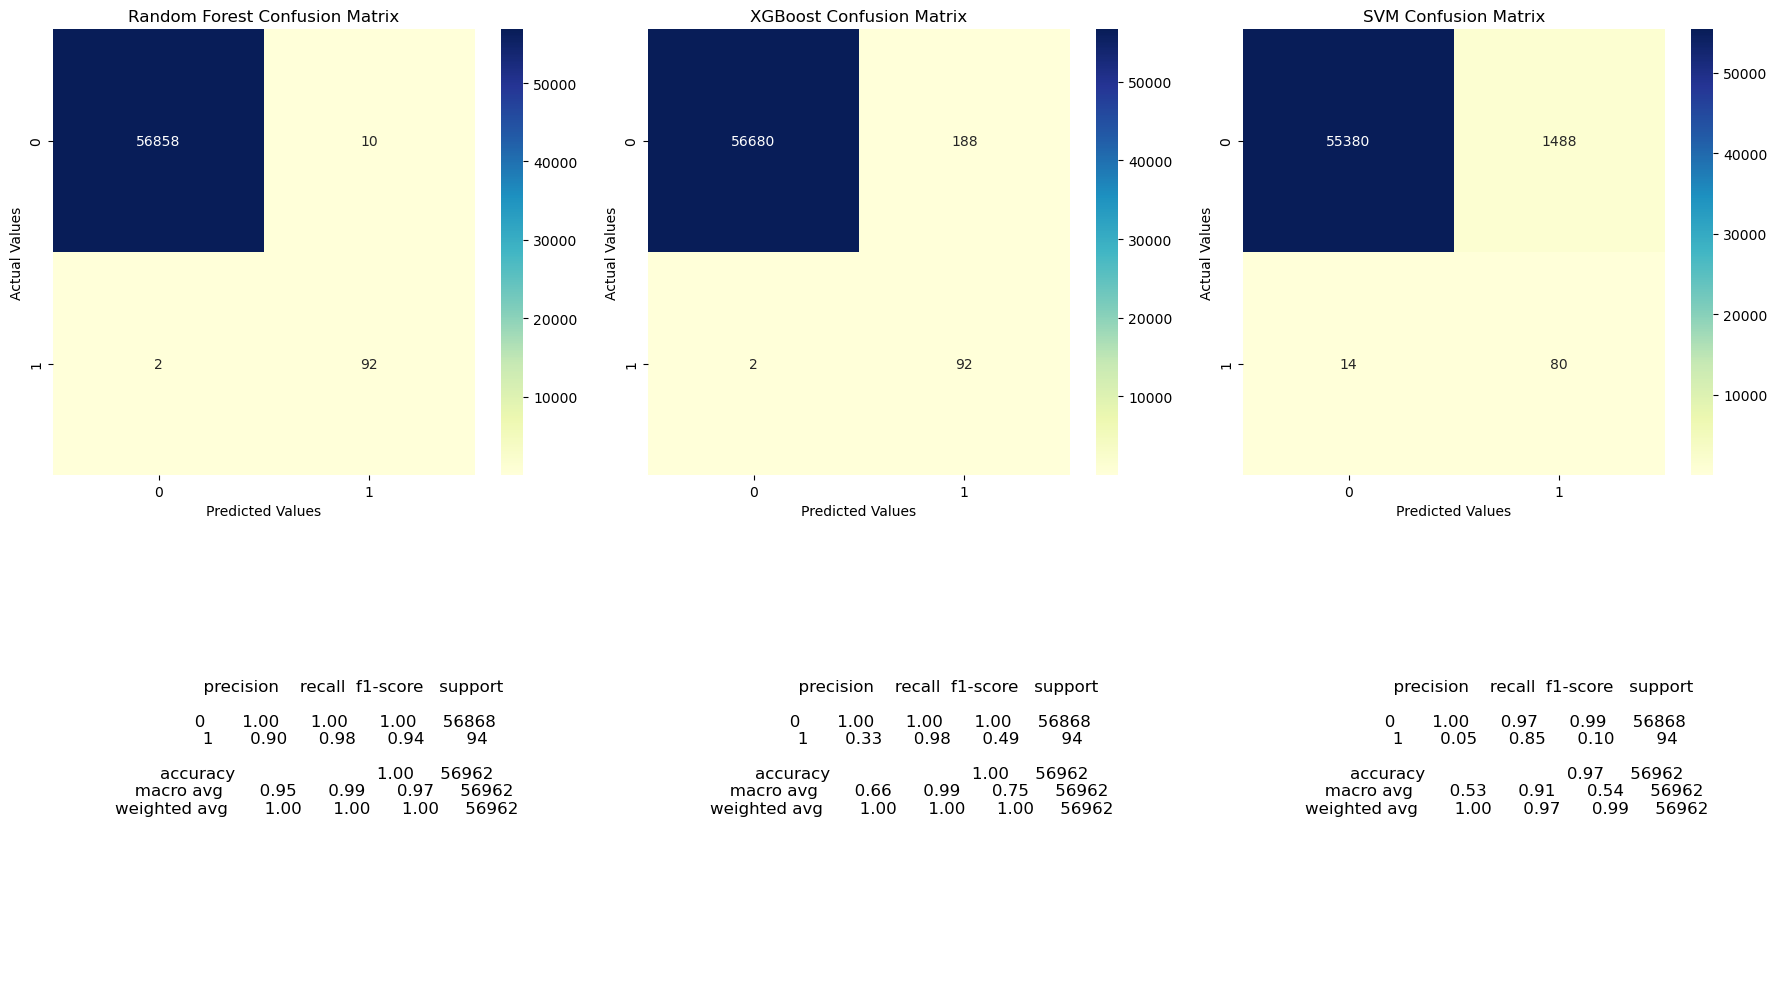

In [67]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_rf, y_pred_xgb, y_pred_svm]

# Create subplots for each model's confusion matrix
plt.figure(figsize=(18, 10))  

for i, model_name in enumerate(model_names):
    confusion_matrix = metrics.confusion_matrix(y_test, predictions[i])
    
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    
    plt.subplot(2, 3, i + 4)
    classification_rep = metrics.classification_report(y_test, predictions[i])
    plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Now it's time to see the results on Undersampled dataset

### Random Forest Classifier:

In [68]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_undersampled, y_train_undersampled)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test)

### Gradient Boosting Classifier (XGBoost):

In [69]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_undersampled, y_train_undersampled)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(x_test)

### Support Vector Machine (SVM):

In [70]:
# Create and train the SVM model with a pipeline for standardization
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_model.fit(x_train_smote, y_train_smote)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test)

### Ploting Confusion Matrices and Classification reports

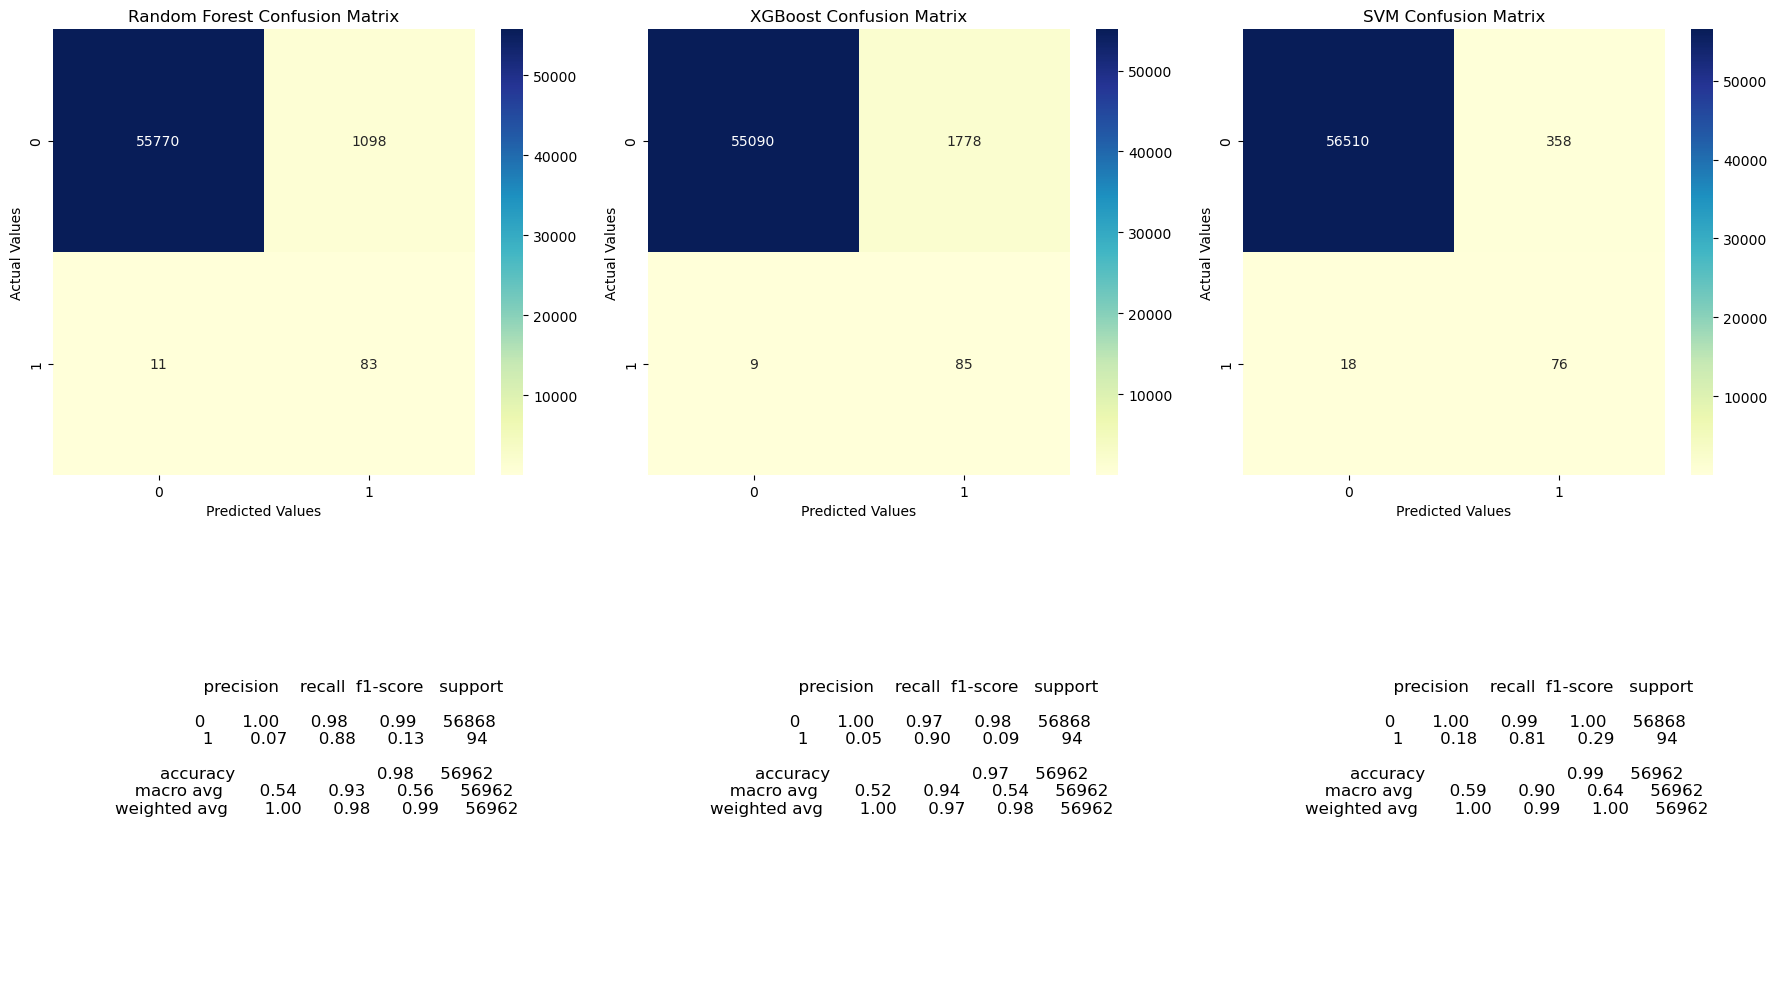

In [71]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_rf, y_pred_xgb, y_pred_svm]

# Create subplots for each model's confusion matrix
plt.figure(figsize=(18, 10))  

for i, model_name in enumerate(model_names):
    confusion_matrix = metrics.confusion_matrix(y_test, predictions[i])
    
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    
    plt.subplot(2, 3, i + 4)
    classification_rep = metrics.classification_report(y_test, predictions[i])
    plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Conclusion

In summary, scaling features can lead to improved results when applying both undersampling and oversampling techniques (including Random Undersampling, Random Oversampling, and SMOTE). These techniques can enhance accuracy, precision, and recall in fraud transaction prediction. Moreover, employing advanced models such as Random Forest Classifier and XGBoost, in combination with data balancing techniques, yields optimal outcomes for predicting fraud transactions.